In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('../content/StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.rename(columns = {'test preparation course':'test_preparation_course', 
                       'math score':'math_score',
                       'reading score':'reading_score',
                        'writing score':'writing_score'}, inplace = True)

In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
data.shape

(1000, 8)

In [9]:
fig1 = px.pie(data, values = data['gender'].value_counts().values, names = data['gender'].value_counts().index)
fig1.show()

In [17]:
fig2 = px.pie(data, values = data['parental level of education'].value_counts().values, names = data['parental level of education'].value_counts().index)
fig2.show()

In [18]:
fig3 = px.pie(data, values = data['race/ethnicity'].value_counts().values, names = data['race/ethnicity'].value_counts().index)
fig3.show()

In [19]:
fig4 = px.pie(data, values = data['lunch'].value_counts().values, names = data['lunch'].value_counts().index)
fig4.show()

In [20]:
fig5 = px.pie(data, values = data['test_preparation_course'].value_counts().values, names = data['test_preparation_course'].value_counts().index)
fig5.show()

In [16]:
fig6 = px.bar(x = data.groupby('gender').math_score.max().index, y = [data.groupby('gender').math_score.max().values, data.groupby('gender').math_score.min().values], barmode = 'group')
fig6.show()

In [21]:
fig7 = px.bar(x = data.groupby('race/ethnicity').math_score.max().index, y = [data.groupby('race/ethnicity').math_score.max().values, data.groupby('race/ethnicity').math_score.min().values], barmode = 'group')
fig7.show()

In [22]:
fig8 = px.bar(x = data.groupby('parental level of education').math_score.max().index, y = [data.groupby('parental level of education').math_score.max().values, data.groupby('parental level of education').math_score.min().values], barmode = 'group')
fig8.show()

In [23]:
fig9 = px.bar(x = data.groupby('test_preparation_course').math_score.max().index, y = [data.groupby('test_preparation_course').math_score.max().values, data.groupby('test_preparation_course').math_score.min().values], barmode = 'group')
fig9.show()

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

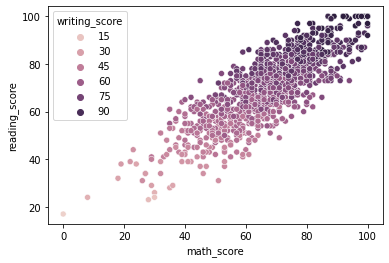

In [24]:
sns.scatterplot(x = data.math_score, y = data.reading_score, hue = data.writing_score)

In [25]:
fig10 = px.histogram(data, x="math_score", marginal = 'box')
fig10.show()

In [26]:
fig11 = px.histogram(data, x="writing_score", marginal = 'box')
fig11.show()

In [27]:
fig13 = px.histogram(data, x="reading_score", marginal = 'box')
fig13.show()

In [28]:
import plotly.figure_factory as ff
import numpy as np

x1 = data.math_score
x2 = data.writing_score
x3 = data.reading_score

hist_data = [x1, x2, x3]

group_labels = ['math score', 'writing score', 'reading score']
colors = ['#393E46', '#2BCDC1', '#F66095']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

# Add title
fig.update_layout(title_text='Curve and Rug Plot')
fig.show()